In [16]:
from bs4 import BeautifulSoup
import urllib3
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
%matplotlib inline
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap



Populating the interactive namespace from numpy and matplotlib


/Users/Eike/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['bincount']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5,1,'hexbin')

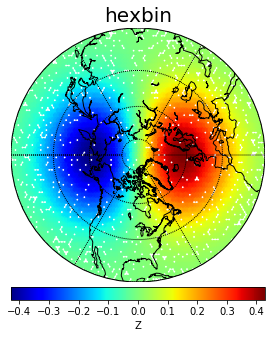

In [21]:

# example showing how to plot scattered data with hexbin.
from numpy.random import uniform
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

# create north polar stereographic basemap
m = Basemap(lon_0=270, boundinglat=20, projection='npstere',round=True)
#m = Basemap(lon_0=-105,lat_0=40,projection='ortho')

# number of points, bins to plot.
npts = 50000
bins = 90

# generate random points on a sphere,
# so that every small area on the sphere is expected
# to have the same number of points.
# http://mathworld.wolfram.com/SpherePointPicking.html
u = uniform(0.,1.,size=npts)
v = uniform(0.,1.,size=npts)
lons = 360.*u
lats = (180./np.pi)*np.arccos(2*v-1) - 90.
# toss points outside of map region.
lats = np.compress(lats > 20, lats)
lons = np.compress(lats > 20, lons)
# convert to map projection coordinates.
x1, y1 = m(lons, lats)
# remove points outside projection limb.
x = np.compress(np.logical_or(x1 < 1.e20,y1 < 1.e20), x1)
y = np.compress(np.logical_or(x1 < 1.e20,y1 < 1.e20), y1)
# function to plot at those points.
xscaled = 4.*(x-0.5*(m.xmax-m.xmin))/m.xmax
yscaled = 4.*(y-0.5*(m.ymax-m.ymin))/m.ymax
z = xscaled*np.exp(-xscaled**2-yscaled**2)


# make plot using hexbin
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(122)
CS = m.hexbin(x,y,C=z,gridsize=bins,cmap=plt.cm.jet)
# draw coastlines, lat/lon lines.
m.drawcoastlines()
m.drawparallels(np.arange(0,81,20))
m.drawmeridians(np.arange(-180,181,60))
m.colorbar(location="bottom",label="Z") # draw colorbar
plt.title('hexbin', fontsize=20)



In [23]:
rev= pd.read_csv('data/reviews_total_geo_3.csv',dtype={'id':np.int64})

In [25]:
import pickle
name = 'data/Top50/reviews/Pickles/SentimentPerUser.pickle'
with open(name, 'rb') as f:
    print("loaded Traindata",name)
    sentiment= pickle.load(f)

loaded Traindata data/Top50/reviews/Pickles/SentimentPerUser.pickle


In [30]:
sentiment['2007934740']

defaultdict(float, {'overall': 6.502, 'as_Surfer': 6.502, 'as_Host': 0.0})